## Yêu cầu:
- mình muốn phân tích từ đó rút ra quy luật hoạt động của máy bơm

- Thấp điểm cao điểm

- có những thời điểm nào cao bất thường hay không

- Ngoài ra mình cũng muốn xem bên các dữ liệu còn lại có tương quan gì với dữ liệu chính hay không

- Nếu mà thêm phần dự đoán đc trend nữa thì okay bạn

# Trả lời

1. Về độ tương quan của các thuộc tính với Usage_history: Có độ tương quan, nhưng không đáng kể (-0.2 => 0.2). Do vậy, ta coi như Usage_history không phụ thuộc vào các thuộc tính khác.

2. Về quy luật máy bơm:
- Máy bơm có xu hướng bơm ít nhất vào thời điểm 3h - 7h sáng

- Cao điểm của máy bơm là lúc 21h - 23h. 

- Thời điểm từ 6h - 18h nhìn chung máy bơm bơm tương đối đều

-  Một số điểm ngoại lệ có thể xem xét như: 20/04, 23/04, 30/04, 09/05: giá trị lên tới 15, thậm chí xấp xỉ 16

3. Dự đoán theo ngày ở phần cuối



### Khai báo thư viện

In [74]:
import pandas as pd


import matplotlib.pyplot as plt
%matplotlib inline

from pylab import rcParams
rcParams['figure.figsize'] = 16,9

## Input data

In [75]:
df_main = pd.read_csv('data/Usage history-data-2022-05-17 12_03_27.csv')
df_1 = pd.read_csv('data/Motor Duty Cycle-data-2022-05-17 12_04_34.csv')
df_2 = pd.read_csv('data/Runtime Average Phase Current-data-2022-05-17 12_04_15.csv')

In [76]:
df_main.head()

Time  Pump 1 current
0  2022-04-17 12:00:00            8.25
1  2022-04-17 13:00:00            5.24
2  2022-04-17 14:00:00            8.94
3  2022-04-17 15:00:00            6.89
4  2022-04-17 16:00:00            6.77

## Visualize data

In [77]:
df_main.dtypes

Time               object
Pump 1 current    float64
dtype: object

In [78]:
df_main['Time'] = pd.to_datetime(df_main.Time)

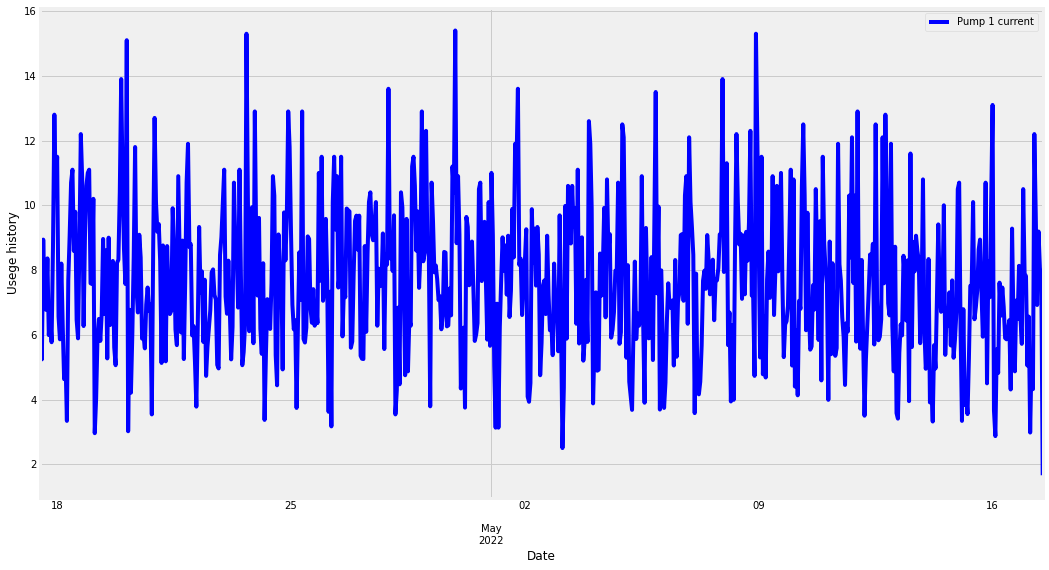

In [79]:
# Set the date column as the index of your DataFrame discoveries
df_main = df_main.set_index('Time')

# Plot the time series in your DataFrame
ax = df_main.plot(color='blue')

# Specify the x-axis label in your plot
ax.set_xlabel('Date')

# Specify the y-axis label in your plot
ax.set_ylabel('Usege history');

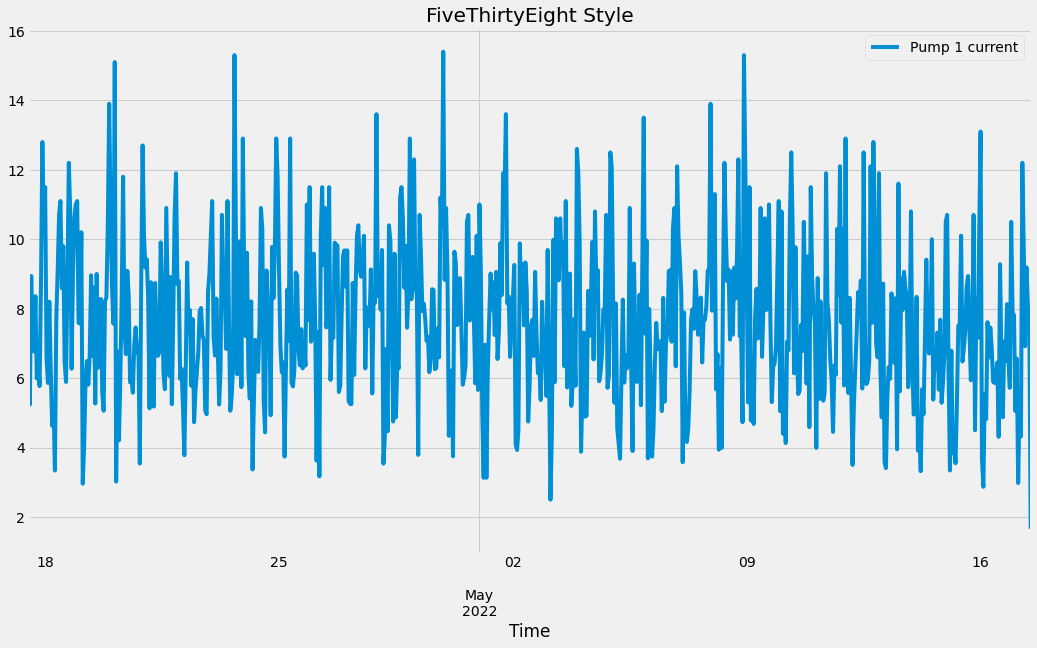

In [80]:
# Use the fivethirtyeight style
plt.style.use('fivethirtyeight')

# Plot the time series
ax1 = df_main.plot()
ax1.set_title('FiveThirtyEight Style');

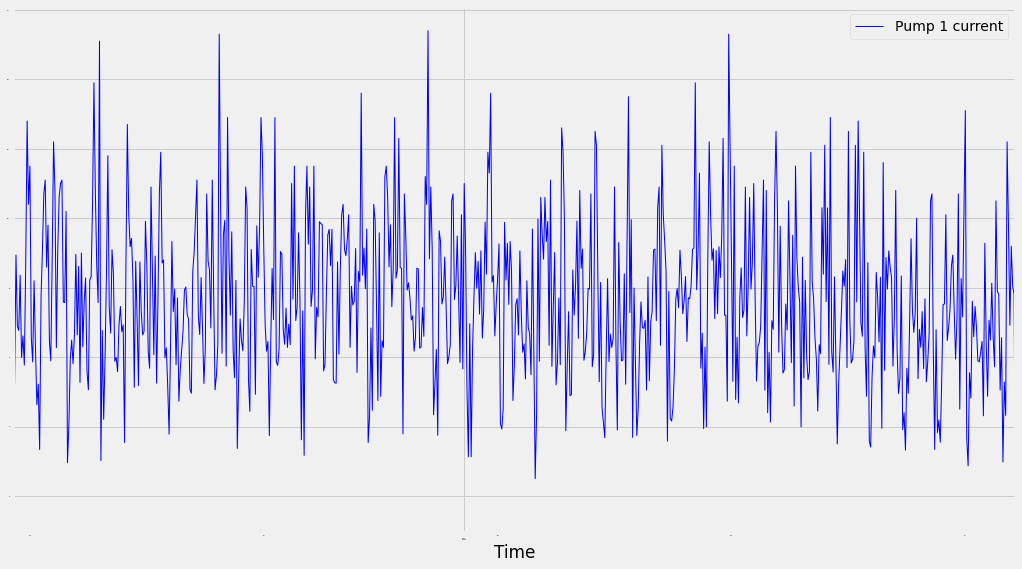

In [81]:
# Plot a line chart of the discoveries DataFrame using the specified arguments
ax = df_main.plot(color='blue', linewidth=1, fontsize=2)

# Specify the title in your plot
# ax.set_title('Number of great inventions and scientific discoveries from 1860 to 1959', fontsize=8);

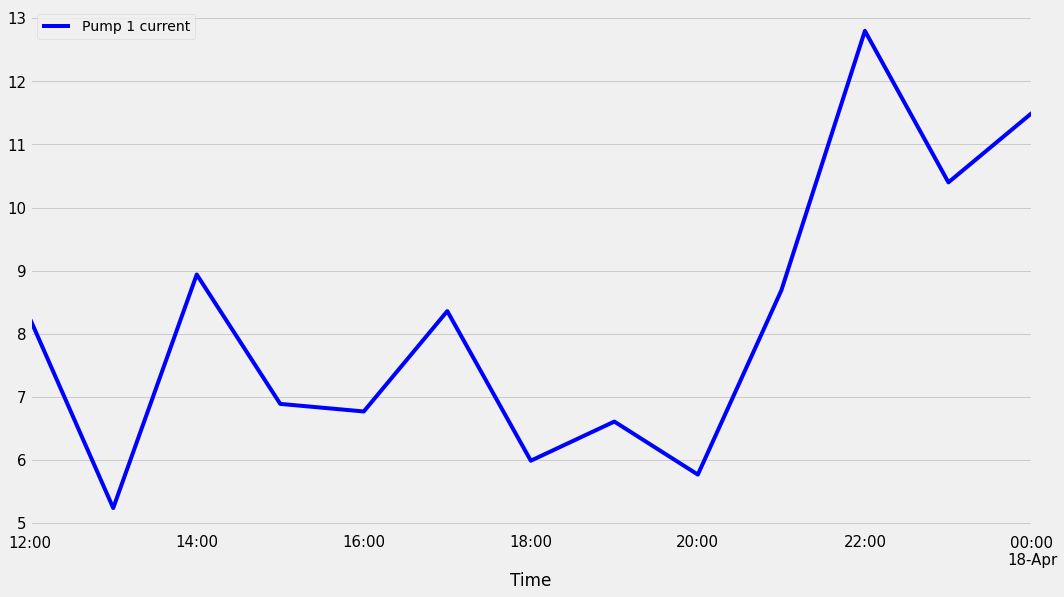

In [82]:
discoveries_subset_1 = df_main['2022-04-17 00:00:00':'2022-04-18 00:00:00']


ax = discoveries_subset_1.plot(color='blue', fontsize=15);


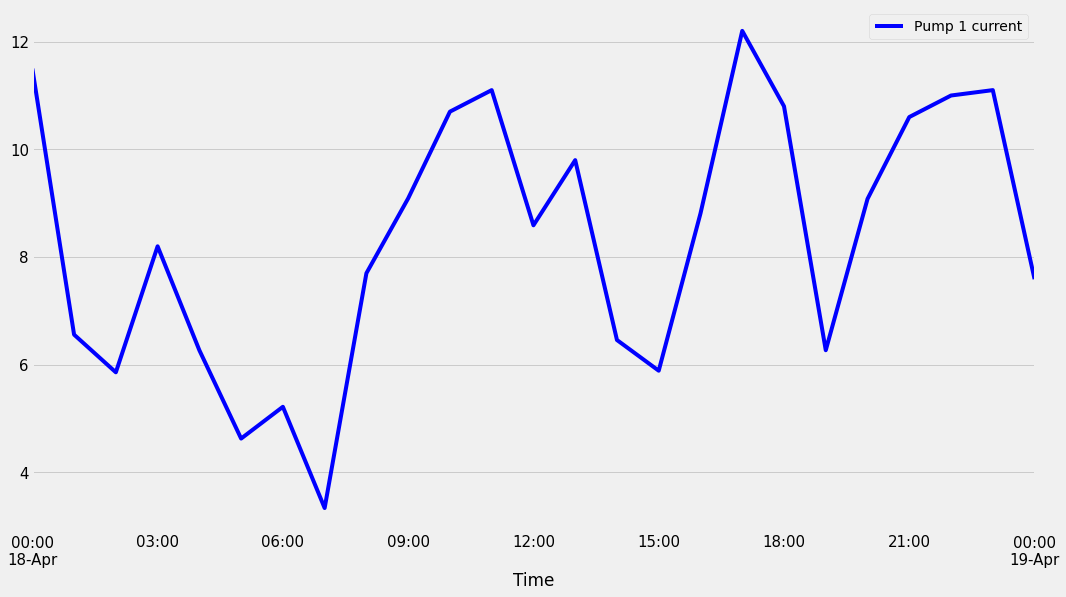

In [83]:
discoveries_subset_1 = df_main['2022-04-18 00:00:00':'2022-04-19 00:00:00']


ax = discoveries_subset_1.plot(color='blue', fontsize=15);

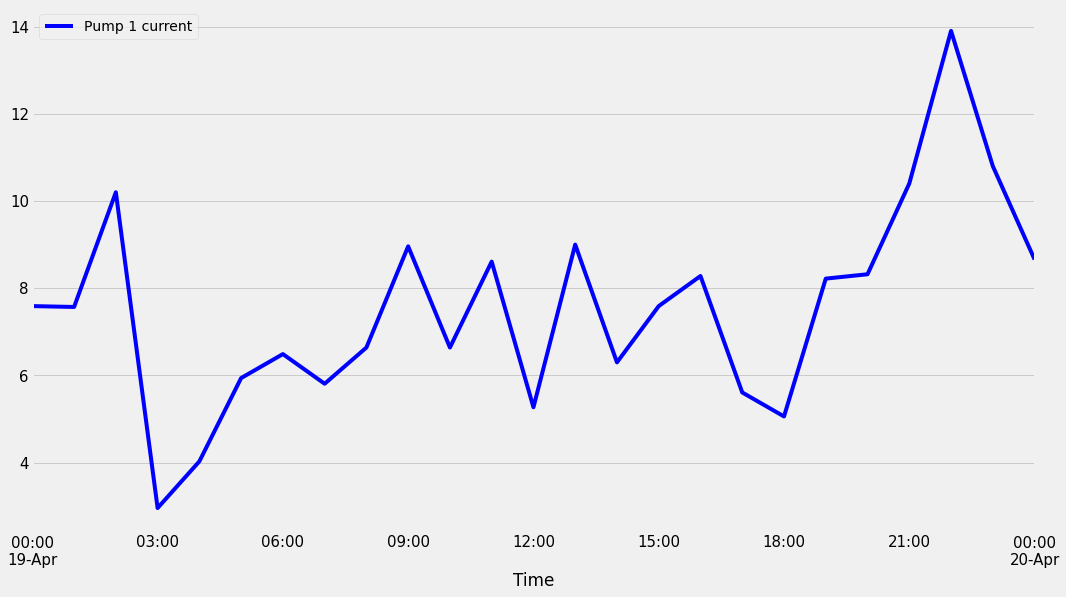

In [84]:
discoveries_subset_1 = df_main['2022-04-19 00:00:00':'2022-04-20 00:00:00']


ax = discoveries_subset_1.plot(color='blue', fontsize=15);

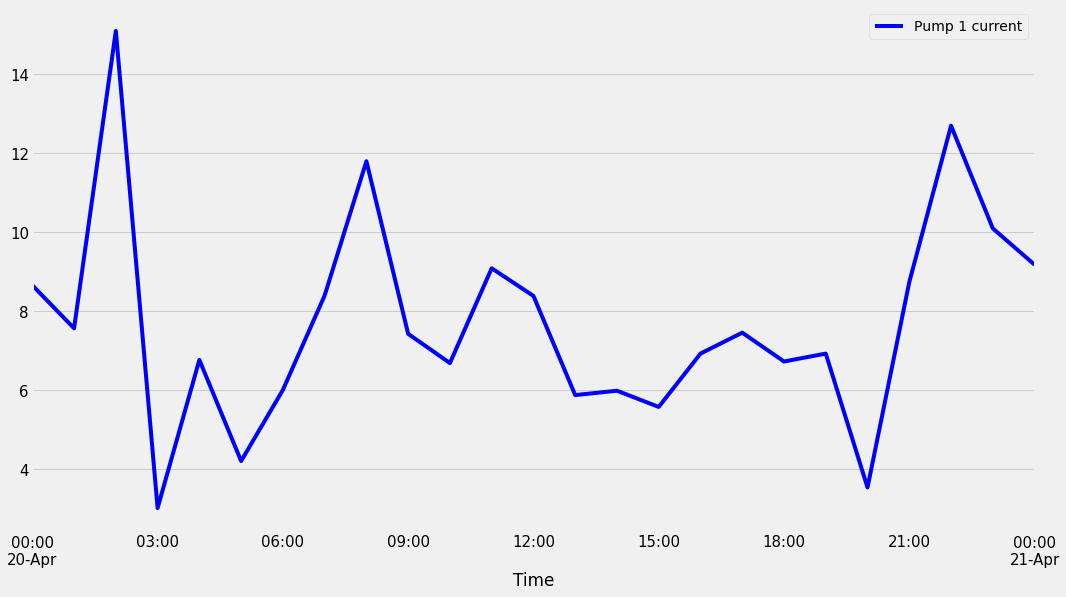

In [85]:
discoveries_subset_1 = df_main['2022-04-20 00:00:00':'2022-04-21 00:00:00']


ax = discoveries_subset_1.plot(color='blue', fontsize=15);

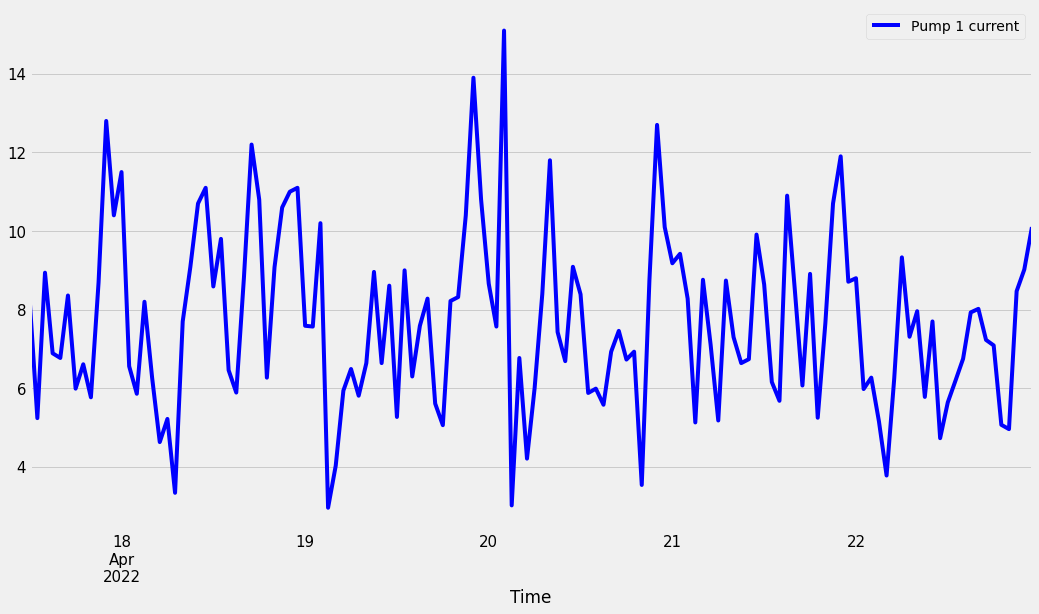

In [86]:
discoveries_subset_1 = df_main['2022-04-17': '2022-04-22']


ax = discoveries_subset_1.plot(color='blue', fontsize=15);


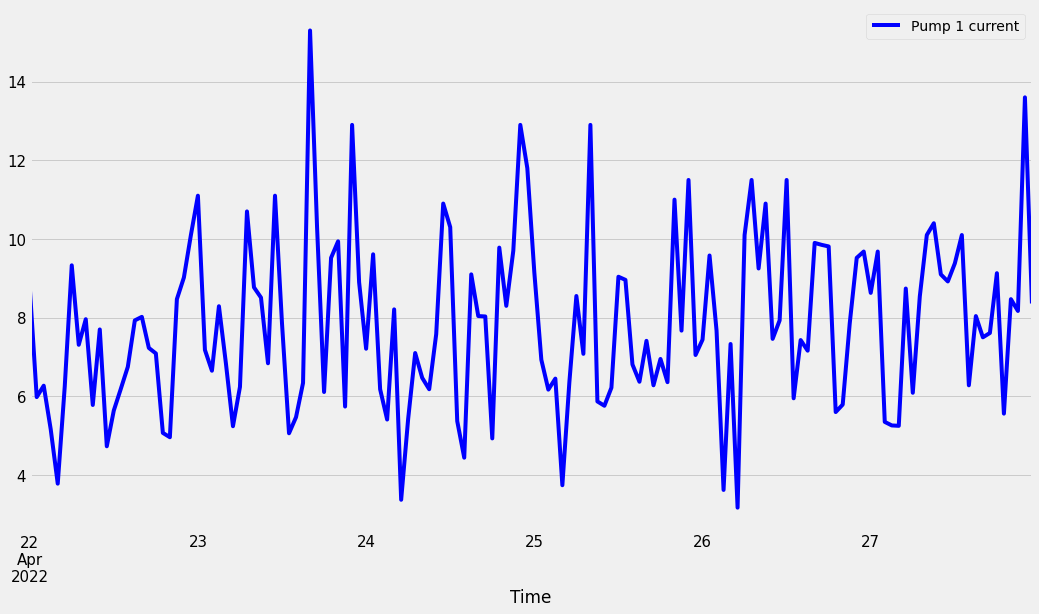

In [87]:
discoveries_subset_1 = df_main['2022-04-22': '2022-04-27']


ax = discoveries_subset_1.plot(color='blue', fontsize=15);


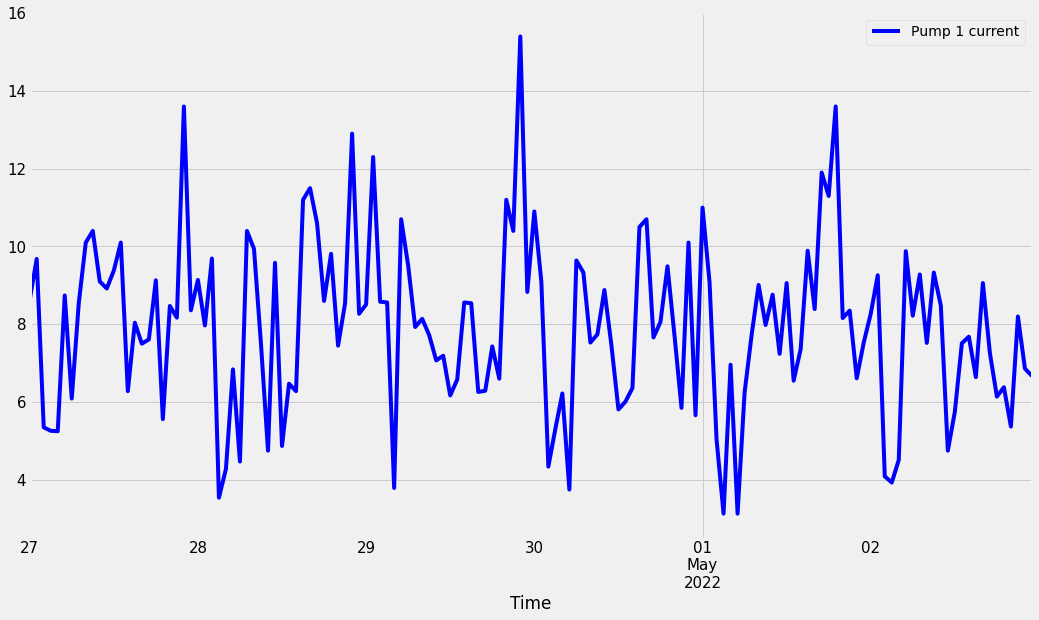

In [88]:
discoveries_subset_1 = df_main['2022-04-27': '2022-05-02']


ax = discoveries_subset_1.plot(color='blue', fontsize=15);


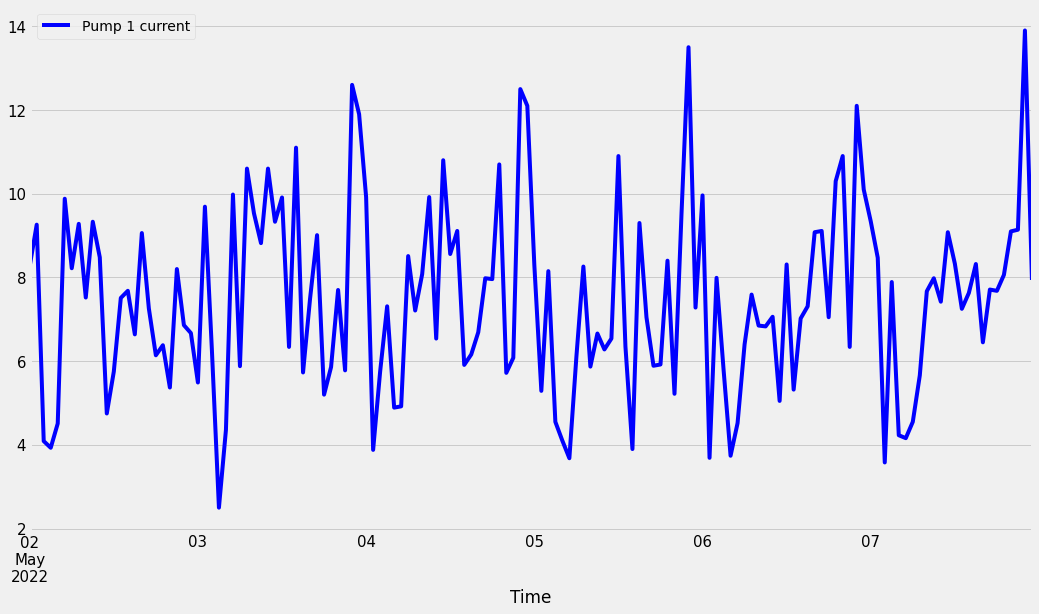

In [89]:
discoveries_subset_1 = df_main['2022-05-02': '2022-05-07']


ax = discoveries_subset_1.plot(color='blue', fontsize=15);


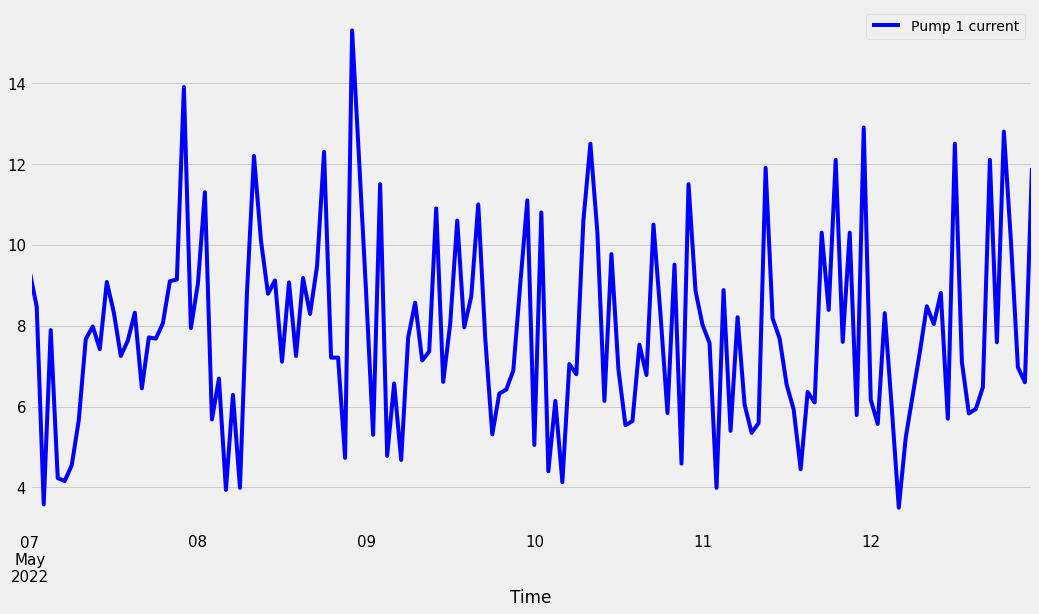

In [90]:
discoveries_subset_1 = df_main['2022-05-07': '2022-05-12']


ax = discoveries_subset_1.plot(color='blue', fontsize=15);


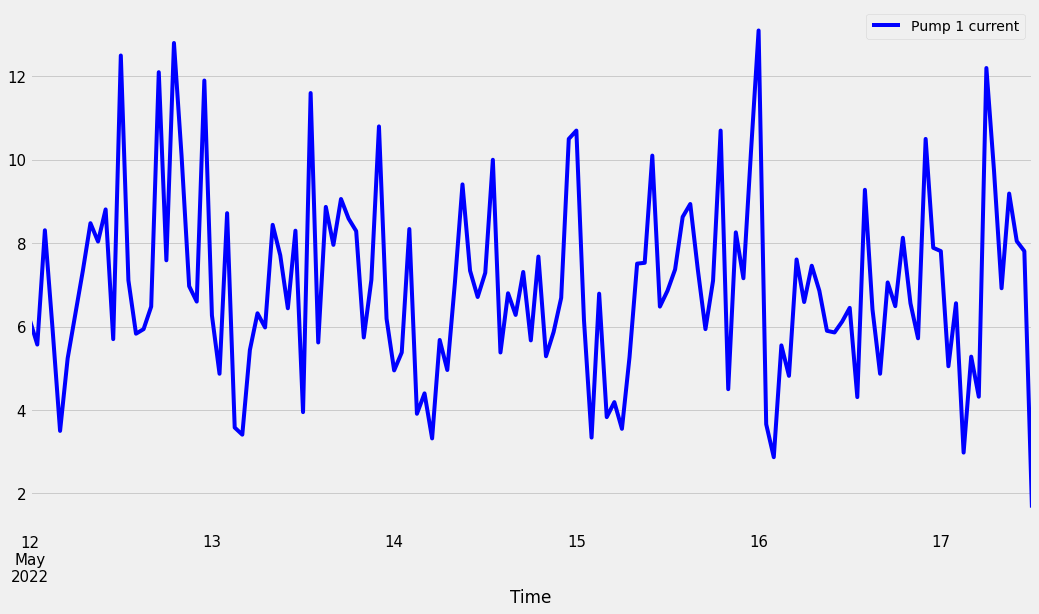

In [91]:
discoveries_subset_1 = df_main['2022-05-12': '2022-05-17']


ax = discoveries_subset_1.plot(color='blue', fontsize=15);


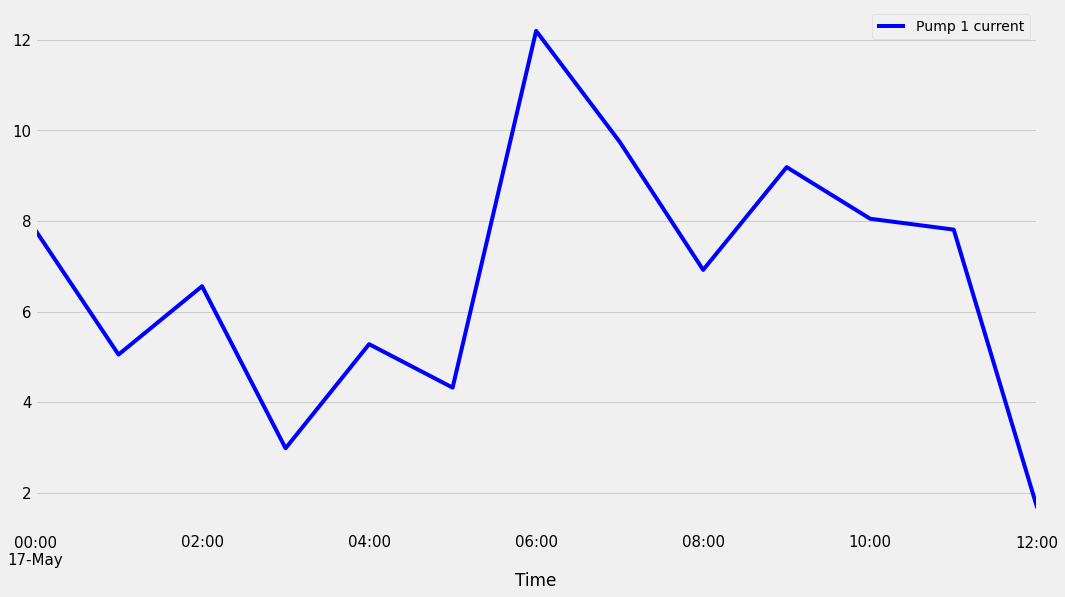

In [92]:
discoveries_subset_1 = df_main['2022-05-17': '2022-05-22']


ax = discoveries_subset_1.plot(color='blue', fontsize=15);


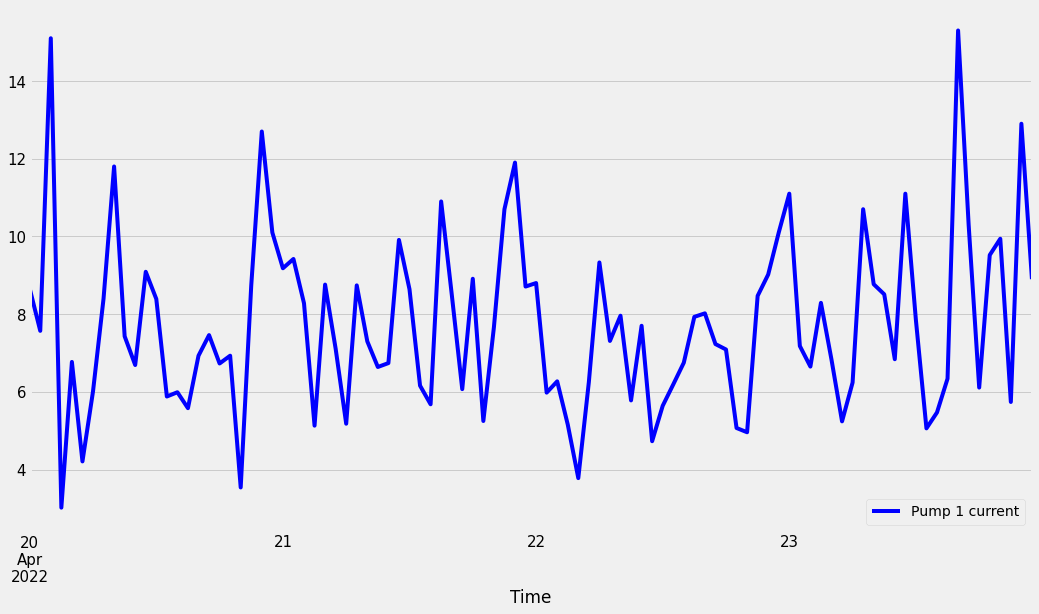

In [93]:
# Select the subset of data between 1945 and 1950
discoveries_subset_1 = df_main['2022-04-20':'2022-04-23']


# Plot the time series in your DataFrame as a blue area chart
ax = discoveries_subset_1.plot(color='blue', fontsize=15);

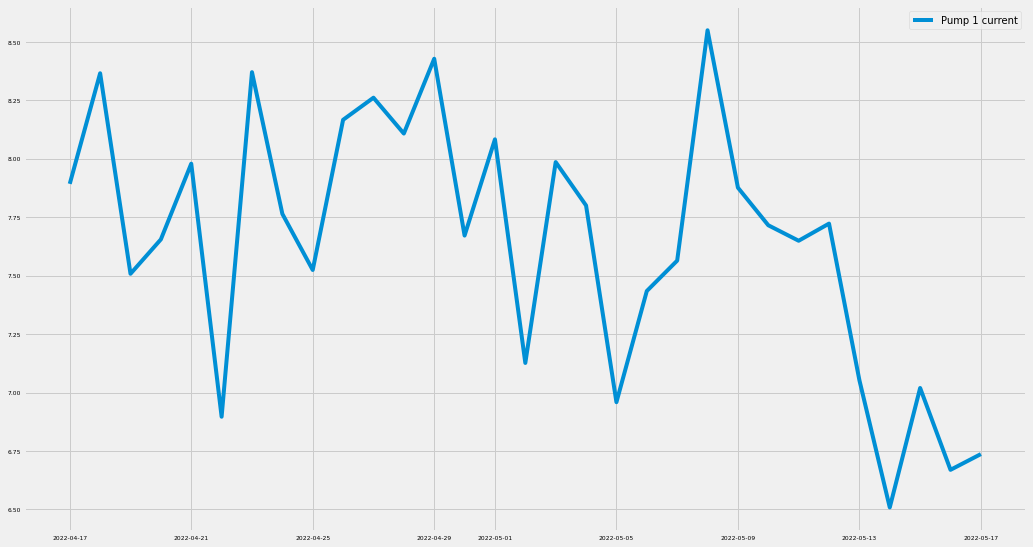

In [94]:
# Get month for each dates in the index of co2_levels
index_date = df_main.index.date

# Compute the mean CO2 levels for each month of the year
mean_date = df_main.groupby(index_date).mean()

# Plot the mean CO2 levels for each month of the year
mean_date.plot(fontsize=6)

# Specify the fontsize on the legend
plt.legend(fontsize=10);

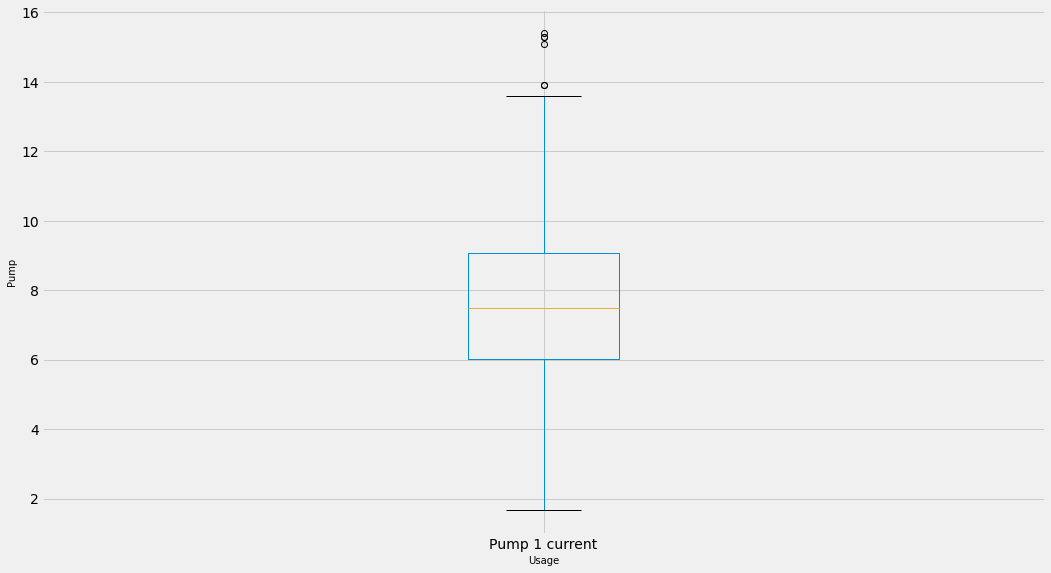

In [95]:
# Generate a boxplot
ax = df_main.boxplot()

# Set the labels and display the plot
ax.set_xlabel('Usage', fontsize=10)
ax.set_ylabel('Pump', fontsize=10);

<Figure size 1080x576 with 0 Axes>

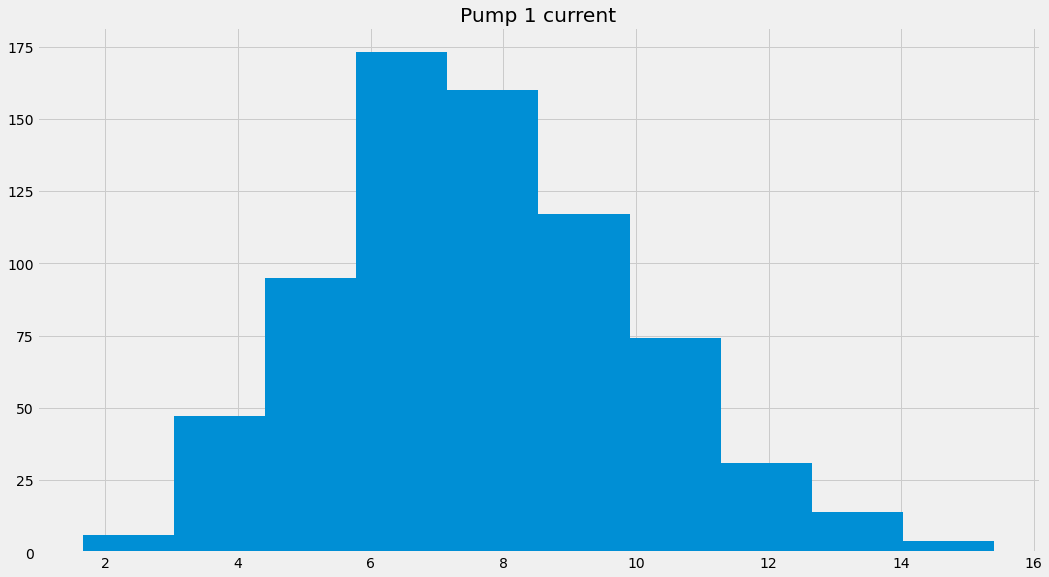

In [96]:
fig = plt.figure(figsize=(15,8))
df_main.hist()
plt.show()

## Phân tích tổng quan tất cả dữ liệu

In [97]:
df_all = pd.read_csv('data/data_all.csv')

In [98]:
df_all.head()

Time  Usage_history  Time_Between_Cycles  Runtime_Average   \
0  2022-04-17 12:00:00           8.25                 14.2              52.6   
1  2022-04-17 13:00:00           5.24                 14.9              52.1   
2  2022-04-17 14:00:00           8.94                 15.8              51.7   
3  2022-04-17 15:00:00           6.89                 16.4              51.5   
4  2022-04-17 16:00:00           6.77                 16.0              52.3   

   Running_Cycle  Motor_Duty   
0            265        0.238  
1            229        0.205  
2            222        0.191  
3            204        0.172  
4            223        0.188

In [99]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df_all)
profile

Render HTML: 100%|██████████| 1/1 [00:02<00:00,  2.23s/it]


# Dự đoán trend

LSTM

In [100]:
df_main.values.shape

(721, 1)

In [101]:
df_train = df_main.values.reshape(721, )

In [124]:
x_train = []
y_train = []
for i in range(5, len(df_train)):
    x = df_train[(i-5):i]
    x_train.append(x)
    # x_train.append(df_train[(i-5):i])
    y_train.append(df_train[i])
    # print(x)

In [130]:
import numpy as np
x_train = np.array(x_train)
y_train = np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [117]:


regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (5, 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [132]:
regressor.fit(x_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
23/23 [==============================] - 14s 20ms/step - loss: 57.3280
Epoch 2/100
23/23 [==============================] - 0s 22ms/step - loss: 8.1618
Epoch 3/100
23/23 [==============================] - 1s 22ms/step - loss: 6.5405
Epoch 4/100
23/23 [==============================] - 1s 28ms/step - loss: 5.9868
Epoch 5/100
23/23 [==============================] - 1s 23ms/step - loss: 5.8858
Epoch 6/100
23/23 [==============================] - 1s 24ms/step - loss: 5.6431
Epoch 7/100
23/23 [==============================] - 1s 25ms/step - loss: 5.7364
Epoch 8/100
23/23 [==============================] - 1s 24ms/step - loss: 5.3130
Epoch 9/100
23/23 [==============================] - 1s 25ms/step - loss: 5.8376
Epoch 10/100
23/23 [==============================] - 1s 26ms/step - loss: 6.0527
Epoch 11/100
23/23 [==============================] - 1s 26ms/step - loss: 5.4663
Epoch 12/100
23/23 [==============================] - 1s 24ms/step - loss: 6.3286
Epoch 13/100
23/23 [===

Dự đoán

In [133]:
inputs = df_main[len(df_main) - 10 - 5:].values
inputs = inputs.reshape(-1,1)

In [134]:
inputs

array([[10.5 ],
       [ 7.89],
       [ 7.81],
       [ 5.05],
       [ 6.56],
       [ 2.98],
       [ 5.28],
       [ 4.32],
       [12.2 ],
       [ 9.75],
       [ 6.92],
       [ 9.19],
       [ 8.05],
       [ 7.81],
       [ 1.66]])

In [135]:
x_test = []
for i in range(5, len(inputs)):
    x_test.append(inputs[i-5:i, 0])

In [137]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predicted = regressor.predict(x_test)

In [138]:
predicted

array([[7.7705173],
       [7.702774 ],
       [7.695078 ],
       [7.70319  ],
       [7.852163 ],
       [7.854191 ],
       [7.844941 ],
       [7.8500385],
       [7.852814 ],
       [7.848928 ]], dtype=float32)

Dự báo 5h tiếp theo

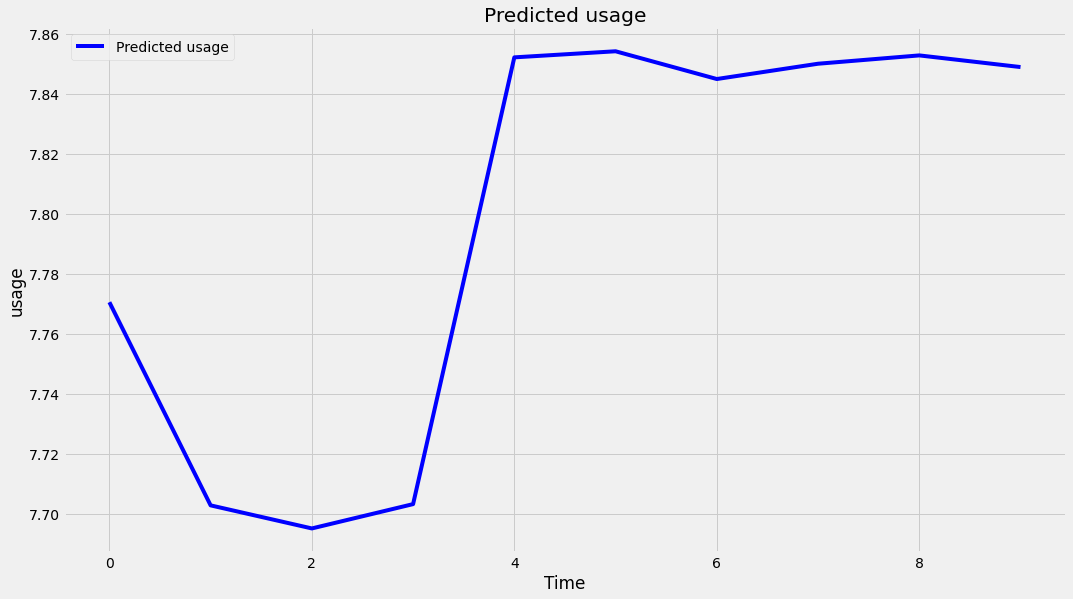

In [139]:
plt.plot(predicted, color = 'blue', label = 'Predicted usage')
plt.title('Predicted usage')
plt.xlabel('Time')
plt.ylabel('usage')
plt.legend()
plt.show()

# KẾT LUẬN:

1. Về độ tương quan của các thuộc tính với Usage_history: Có độ tương quan, nhưng không đáng kể (-0.2 => 0.2). Do vậy, ta coi như Usage_history không phụ thuộc vào các thuộc tính khác.

2. Về quy luật máy bơm:
- Máy bơm có xu hướng bơm ít nhất vào thời điểm 3h - 7h sáng

- Cao điểm của máy bơm là lúc 21h - 23h. 

- Thời điểm từ 6h - 18h nhìn chung máy bơm bơm tương đối đều

-  Một số điểm ngoại lệ có thể xem xét như: 20/04, 23/04, 30/04, 09/05: giá trị lên tới 15, thậm chí xấp xỉ 16

